# LendingClub Dataset
**Dataset Description：**
The dataset contains the loan records released from Lending Club. The problem lenders care is that whether a borrower can repay loan and interest on time. In addition, the loan interest rate is highly related to the loan credit of borrowers. A borrower with a higher credit can easily get loan with a lower rate. The task of the project is to predict whehter a borrower can repay loan and interest on time based on a number of features of the borrower. This is a typical classification problem and this notebook demonstrate how to use Lending Club dataset to decide whether a loan case should be approved based a borrower' features. 

**Dataset Detail Information*
The dataset contains 9,578 recrds in total. Every record has 13 features and 1 label which are described as below. 
* credit.policy: This is the label. Its value is 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", “home_improvement” and "all_other").

* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

* installment: The monthly installments owed by the borrower if the loan is funded.

* log.annual.inc: The natural log of the self-reported annual income of the borrower.

* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

* fico: The FICO credit score of the borrower.Common FICO scores range from 300 to 850,with higher scores indicating better credit.

* days.with.cr.line: The number of days the borrower has had a credit line.

* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments

* not.fully.paid：Whether the borrower will be fully paid or not.

**Learning taks:**
1. Train a classification model to predict "credit.policy" by using the other 13 features.

## Import Packages

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset and Clean Dataset

The purpose of this part is to guarantee the data used in the notebook is reliable. 。

In [31]:
Data = pd.read_csv('loan_data.csv')
Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,NaN
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,471000.000000,3511,25.6,1,0,0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.0


After loading the dataset into the notebook, we can further check basic information of the dataset such as data type. 

In [32]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9577 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


We note that the "not.fully.paid" feature has missed a record. We can repair it by using the average value of this feature to replace the missing value. 

In [33]:
Data['not.fully.paid'] = Data['not.fully.paid'].fillna(Data['not.fully.paid'].mean()) 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   float64
dtypes: float64(7), int64(6), object(1)
memory usage: 1.0+ MB


According to the displayed dataset information, we can conclude that
1. The dataset is complete without missing any record. 
2. There are 13 features and 1 label. There are three possible datatypes, which are loat64,int64 and object
There are seven data types which are：credit_card, debt_consolidation, educational, major_purchase, small_business, home_improvement 和all_other。 Note that the type of purpose is object, which cannot be analyzed directly. This feature will be converted by OneHotEncoder or OrdinalEncoder.

Now, we can proveed to check basic statistical information of these features such as mean values, standard deviation, maximum and minimum values, etc. 

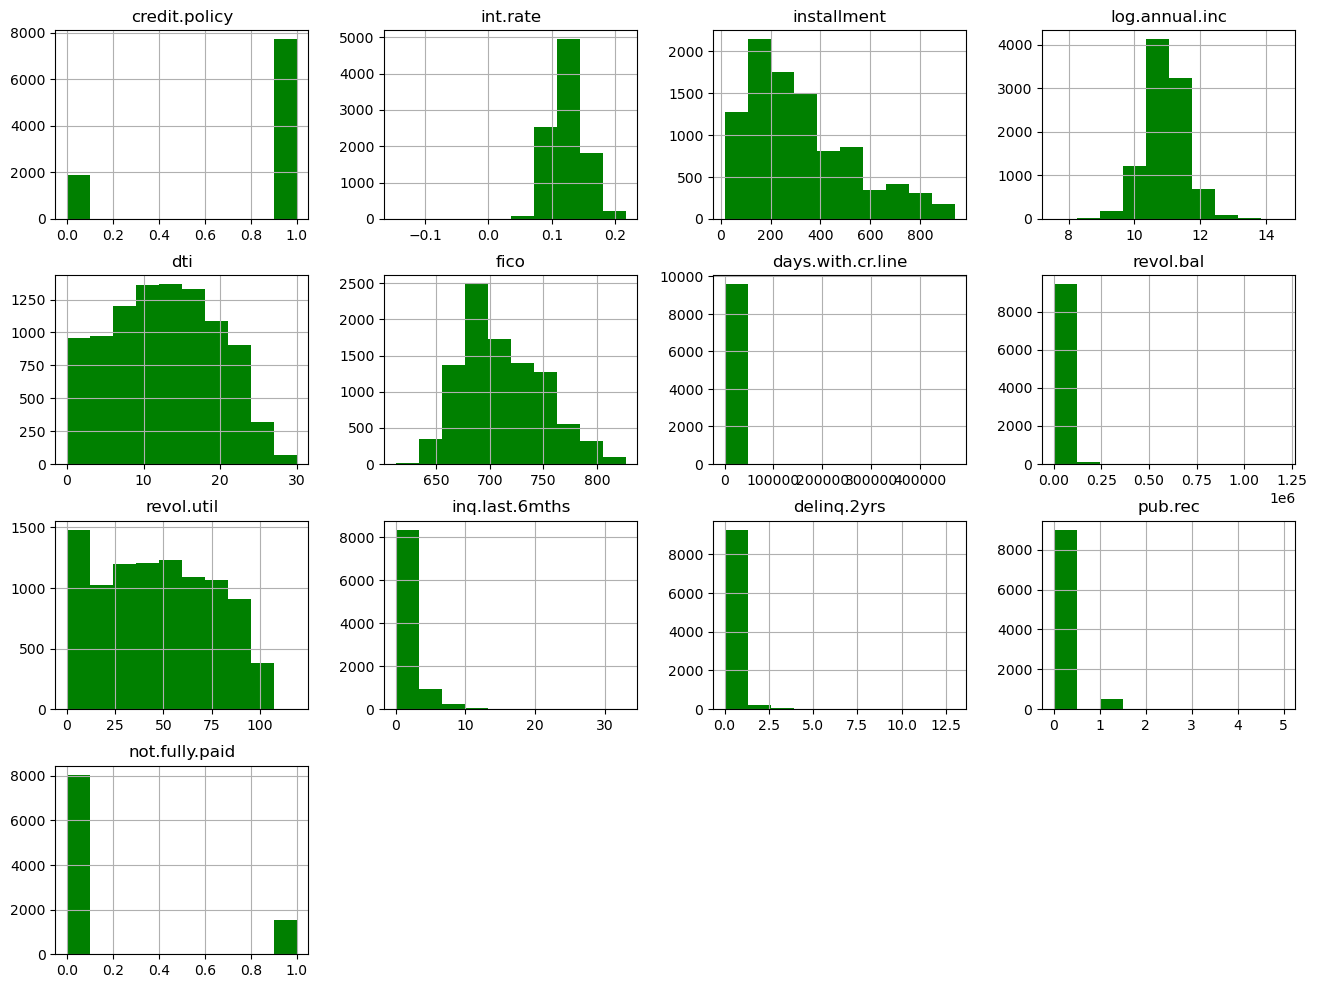

In [34]:
Data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

In [35]:
median_int_rate = Data['int.rate'].median()
Data['int.rate'] = Data['int.rate'].apply(lambda x: median_int_rate if x < 0 else x)


median_days_with_cr_line = Data['days.with.cr.line'].median()
Data['days.with.cr.line'] = Data['days.with.cr.line'].apply(lambda x: median_days_with_cr_line if x > 36500 else x)

numeric_cols = Data.select_dtypes(include=[np.number]).columns.tolist()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Data_scaled = pd.DataFrame(scaler.fit_transform(Data[numeric_cols]), columns=numeric_cols)


Data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122643,0.026841,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.707681,2496.933613,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


Obviously, we can sight that the ranges of values are very different for different features. For example, the mean value of int.rate is 0.122570, but the mean value of revol.bal is more than 16,913. Such big discrepancy may significantly lower the utility of machine learning models. Therefore, we need to normalise these features. 
For normalisation, we can employ min-maxScaling or Standardization methods. 
Meanwhile, we can observe some extreme values in the dataset. For example, the minimum value of int.rate is less than 0, which is impossible in practice. The maxmimum value of days.with.cr.line is 4.71e5 days, equivalent to 1,290.41 years, which is also abnormal. To clean our dataset, we need to remedy these records with these extreme values.If 'int.rate' is negative  it will be replaced by the median value of 'int.rate'.  If 'days.with.cr.line' is greater than 36,500 days (or 100 years), it will be replaced by the median value of 'days.with.cr.line'

## Data Analytics and Classification

Now, our target is to train a logistic regression model and a decision tree model, respectively, to predict 'credit.policy' with 13 features. This is a typical classification problem. 
It is unnecessary to use all 13 features as input of the logistic regression model. To select relevant features, we can plot the heatmap between two features to filter relevant features as our input. 

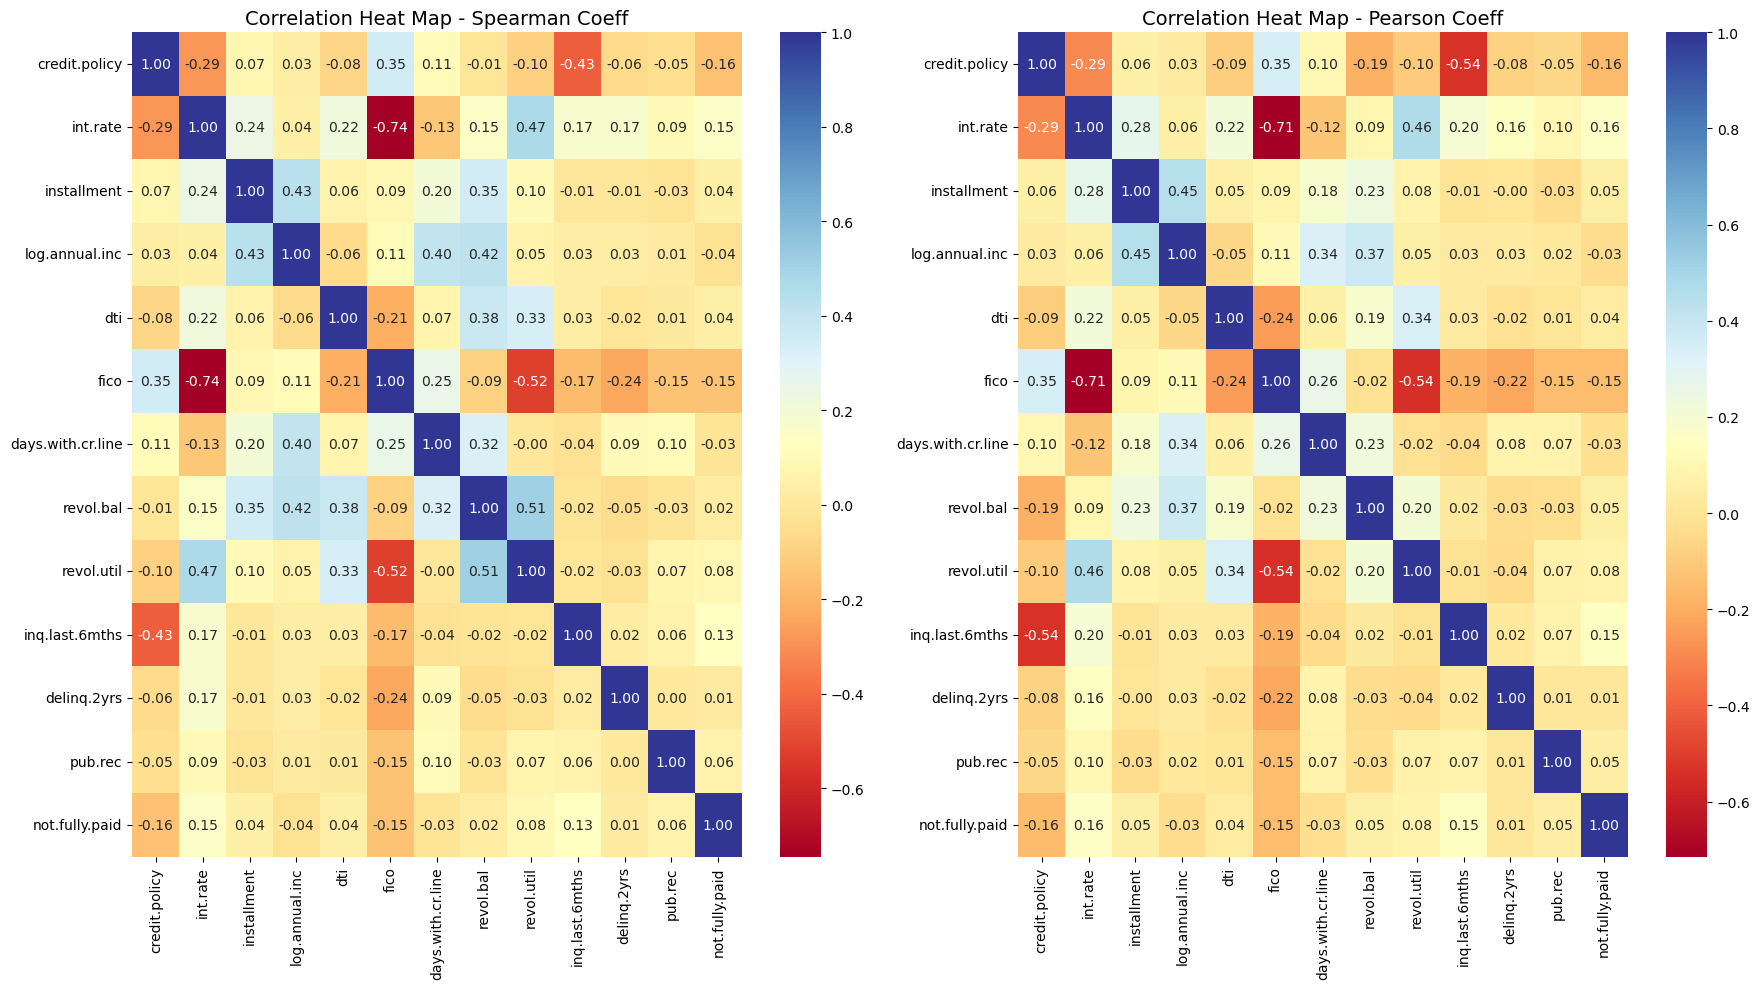

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude non-numeric columns
numeric_data = Data.select_dtypes(include=['float64', 'int64'])

fig = plt.figure(figsize=(18,10))

# Spearman Coefficient heatmap
ax1 = plt.subplot(121)
sns.heatmap(numeric_data.corr(method='spearman'), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize=14)

# Pearson Coefficient heatmap (if you need it)
ax2 = plt.subplot(122)
sns.heatmap(numeric_data.corr(method='pearson'), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize=14)

plt.tight_layout()
plt.show()

From the heatmaps, we can find different correlations between each feature and 'credit.policy'. 
We only reserve features that have positive correlations with 'credit.policy' by removing all features, i.e., 'int.rate', 'revol.bal', 'inq.last.6mths' and 'not.fully.paid' which are negatively correlated with 'credit.policy'. We believe that features with negative correlations are useless for model training. 

## Data Preprocess

### Process of Object data type
The logistic regression model cannot well process the object data type. We convert this data type with OneHotEncoder such that this feature can be handled by the logistic regression model. 

In [45]:
dummy_purpose = pd.get_dummies(Data['purpose'])
dummy_purpose.head() # OneHotEncoder 
New_Data = pd.concat((Data.iloc[:,0], dummy_purpose, Data.iloc[:,2:]), axis=1)
New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,False,False,True,False,False,False,False,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0.160071
1,1,False,True,False,False,False,False,False,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.000000
2,1,False,False,True,False,False,False,False,0.1357,366.86,10.373491,11.63,682,4139.958333,3511,25.6,1,0,0,0.000000
3,1,False,False,True,False,False,False,False,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.000000
4,1,False,True,False,False,False,False,False,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.000000


In [46]:
New_Data = pd.concat([Data.iloc[:, :1], dummy_purpose, Data.iloc[:, 2:]], axis=1)
New_Data = New_Data * 1
dummy_columns = dummy_purpose.columns.tolist()
New_Data[dummy_columns] = New_Data[dummy_columns].astype(int)

dummy_purpose = pd.get_dummies(Data['purpose'])
dummy_purpose.head()  # OneHotEncoder

New_Data.head()

,credit.policy,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0,1,0,0,0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0.160071
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0.000000
2,1,0,0,1,0,0,0,0,0.1357,366.86,10.373491,11.63,682,4139.958333,3511,25.6,1,0,0,0.000000
3,1,0,0,1,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0.000000
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0.000000


### Dataset Splitting
We Split all data records into training set (80%), validation set (10%)  and test set (10%) so that we can determine hyper-parameters with k-cross validation. 

Sort all records by an ascending order of 'credit.policy'. and select the first 90% as the training and validation sets. The rest 10% will be used as the test set. 

In [47]:
from sklearn.model_selection import train_test_split
New_Data.sort_values(by=['credit.policy'])
print(New_Data['credit.policy'].value_counts())


credit.policy
1    7710
0    1868
Name: count, dtype: int64


We complete dataset splitting as below. 

In [54]:
x_ex1 = New_Data.copy().drop(columns=['credit.policy', 'int.rate','revol.bal', 'inq.last.6mths', 'not.fully.paid' ])
y_ex1 = New_Data.copy()['credit.policy']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_ex1_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.9),:]
x_ex1_test = x_ex1_array[int((len(y_ex1_array)+1)*0.9):,:]
y_ex1_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.9)]
y_ex1_test = y_ex1_array[int((len(y_ex1_array)+1)*0.9):]

In [79]:
from sklearn.model_selection import train_test_split

# First, split into 90% for the combination of training and validation, and 10% for test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# Then split the 90% into training and validation sets (89% for training, 11% for validation)
# Note: If you have 90% of the data, and you want to split this into 89% for training and the rest for validation,
# you should set test_size to approximately 0.1222, because 11% is 12.22% of 90%, not 1/9.
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1222, shuffle=True)

In [80]:
from sklearn.model_selection import train_test_split

# Assuming New_Data is your DataFrame and has been sorted by 'credit.policy'
New_Data.sort_values(by='credit.policy', inplace=True)

# Feature matrix and target variable
X = New_Data.drop(columns=['credit.policy', 'int.rate', 'revol.bal', 'inq.last.6mths', 'not.fully.paid'])
y = New_Data['credit.policy']

# First, split the data into 90% for train+validation and 10% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False  # shuffle=False to maintain the sorting order
)

# Now split the train+validation data into 88.9% for training and 11.1% for validation
# which corresponds to 80% and 10% of the original data, respectively
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=1/9, shuffle=False  # Using the fraction 1/9 to get the correct proportions
)

# Now X_train, X_val, X_test, y_train, y_val, and y_test are all defined appropriately

### Data normalisation
Recall that we have observed large value discrepancies between these features. It is necessary to normalise these features before we use them to train our models. 
Here, we emply standardization method to normalise our dataset as below. 

In [81]:
from sklearn.preprocessing import StandardScaler

obje_ss=StandardScaler()

x_ex1_train=obje_ss.fit_transform(x_ex1_train)
x_ex1_test=obje_ss.fit_transform(x_ex1_test)

In [97]:
from sklearn.preprocessing import RobustScaler

obje_rs = RobustScaler()

x_ex1_train = obje_rs.fit_transform(x_ex1_train)
x_ex1_train = obje_rs.transform(x_ex1_train)
x_ex1_test = obje_rs.transform(x_ex1_test)
# Use only transform here to maintain the scale of the training data

## Model Evaluation
In this stage, we are going to train a logistic regression model and a decision tree model. Cross validation will be used to determine hyper-parameters and evaluate model performance.

To simplify our code, we define two functions: onbtain_cross validition_results and plot_result

The conbtain_cross validition_results method will uniformly and randomly put records in the training and validation sets into k different folds. Validation will be conducted for k times. In each time, a single fold is used as the test set while the rest folds will be used as the training set. The evaluation results will be returned as a dictionary to facilitate plotting figures. 

The plot_function will take the dictionary obtained from onbtain_cross validition_results as input to plot figures. 


In [98]:
from sklearn.model_selection import cross_validate
def onbtain_cross_validition_results(model, _X, _y, _cv=9):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
        This is the machine learning algorithm to be used for training.
    _X: array
    This is the matrix of features.
    _y: array
    This is the target variable.
    _cv: int, default=9
    Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''

    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                        X=_X,
                        y=_y,
                        cv=_cv,
                        scoring=_scoring,
                        return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
        "Mean Training Accuracy": results['train_accuracy'].mean()*100,
        "Training Precision scores": results['train_precision'],
        "Mean Training Precision": results['train_precision'].mean(),
        "Training Recall scores": results['train_recall'],
        "Mean Training Recall": results['train_recall'].mean(),
        "Training F1 scores": results['train_f1'],
        "Mean Training F1 Score": results['train_f1'].mean(),
        "Validation Accuracy scores": results['test_accuracy'],
        "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
        "Validation Precision scores": results['test_precision'],
        "Mean Validation Precision": results['test_precision'].mean(),
        "Validation Recall scores": results['test_recall'],
        "Mean Validation Recall": results['test_recall'].mean(),
        "Validation F1 scores": results['test_f1'],
        "Mean Validation F1 Score": results['test_f1'].mean()
        }

def plot_bar_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()
   
def plot_stacked_bar_charts(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        fig, ax =plt.subplots(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7th Fold", "8th Fold", "9th Fold"]
        width = 0.35
        X_axis = np.arange(len(labels))
        ax.bar(labels, train_data, width,  label='Training')
        ax.bar(labels, val_data, width, bottom=train_data,
        label='Validation')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(plot_title)
        ax.legend()
        plt.show()

### Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
log_result = onbtain_cross_validition_results(model_log, x_ex1_train, y_ex1_train, _cv=9)
print(log_result)


{'Training Accuracy scores': array([0.83022315, 0.82996216, 0.83061464, 0.82030536, 0.81273653,
       0.8137805 , 0.81665144, 0.81639045, 0.81628392]), 'Mean Training Accuracy': 82.0772017284718, 'Training Precision scores': array([0.83895617, 0.83764368, 0.83563989, 0.82577465, 0.82006726,
       0.81846025, 0.82178356, 0.82191397, 0.82372834]), 'Mean Training Precision': 0.8271075306633413, 'Training Recall scores': array([0.96934866, 0.97118108, 0.97567883, 0.97667833, 0.97484591,
       0.97950683, 0.97800733, 0.97734089, 0.97384641]), 'Mean Training Recall': 0.9751593620791144, 'Training F1 scores': array([0.89945127, 0.89948314, 0.90024593, 0.89490956, 0.89078316,
       0.89177095, 0.89311525, 0.89291422, 0.89251908]), 'Mean Training F1 Score': 0.895021398158245, 'Validation Accuracy scores': array([0.77035491, 0.7651357 , 0.77244259, 0.81210856, 0.84029228,
       0.84968685, 0.83298539, 0.83924843, 0.8338558 ]), 'Mean Validation Accuracy': 81.29011662954504, 'Validation Preci

To better understand our result, we visualize the performance evluation results as below. 


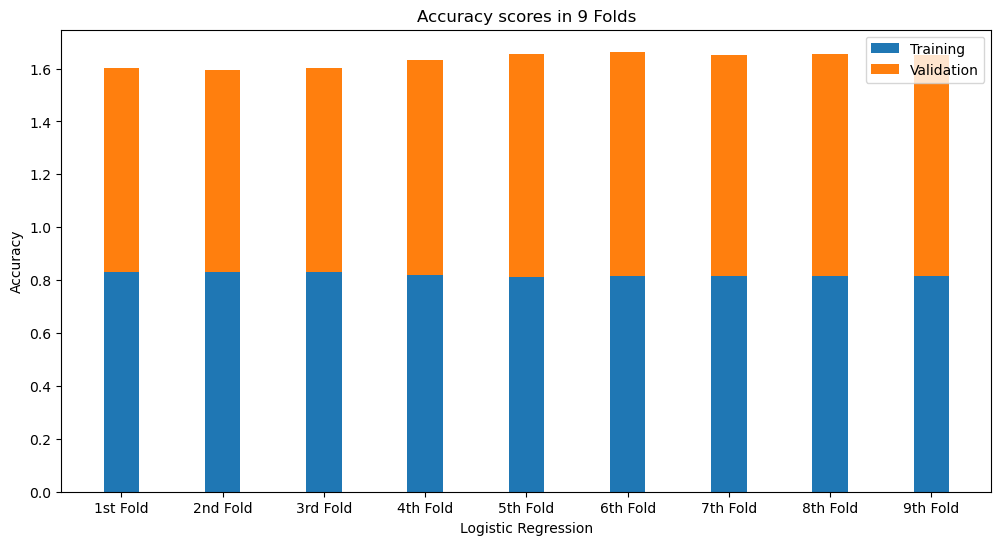

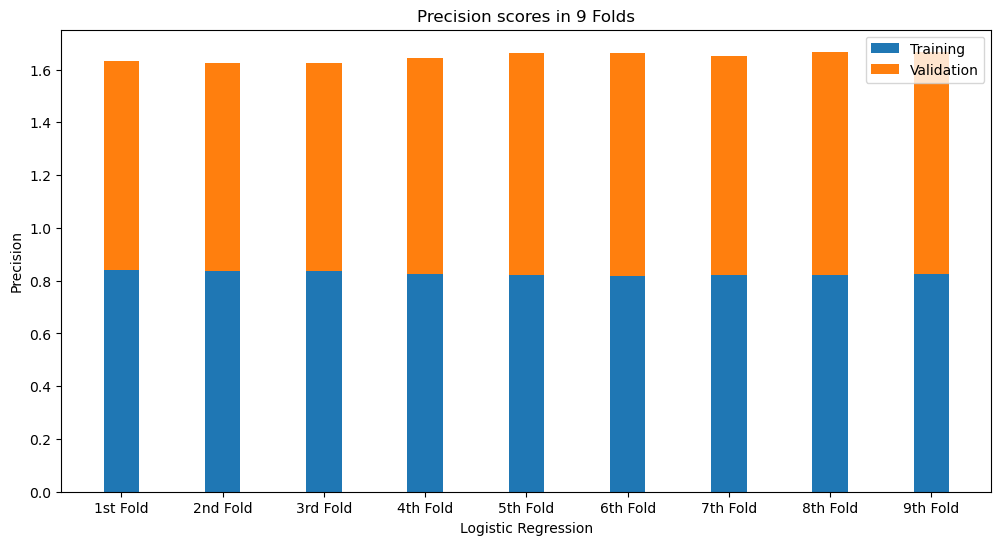

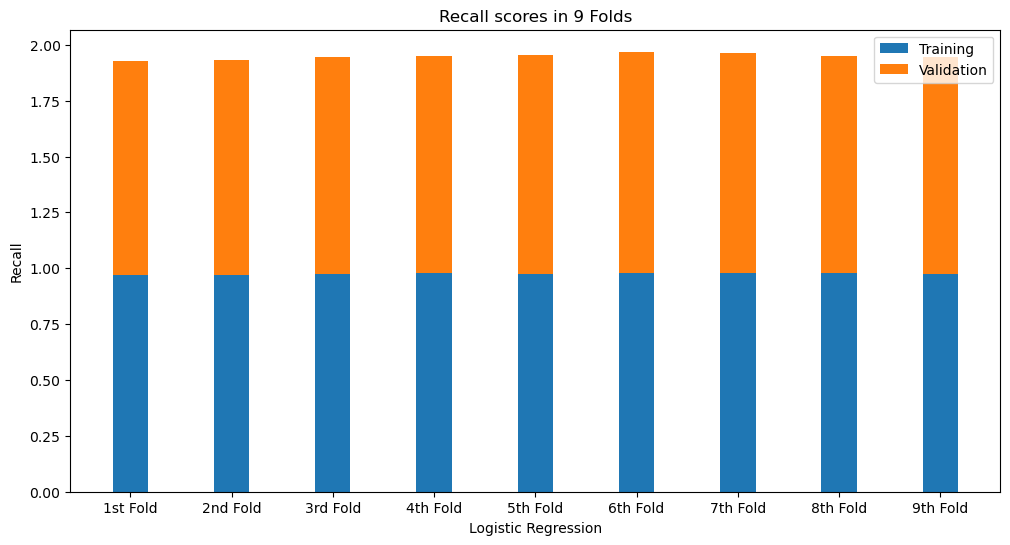

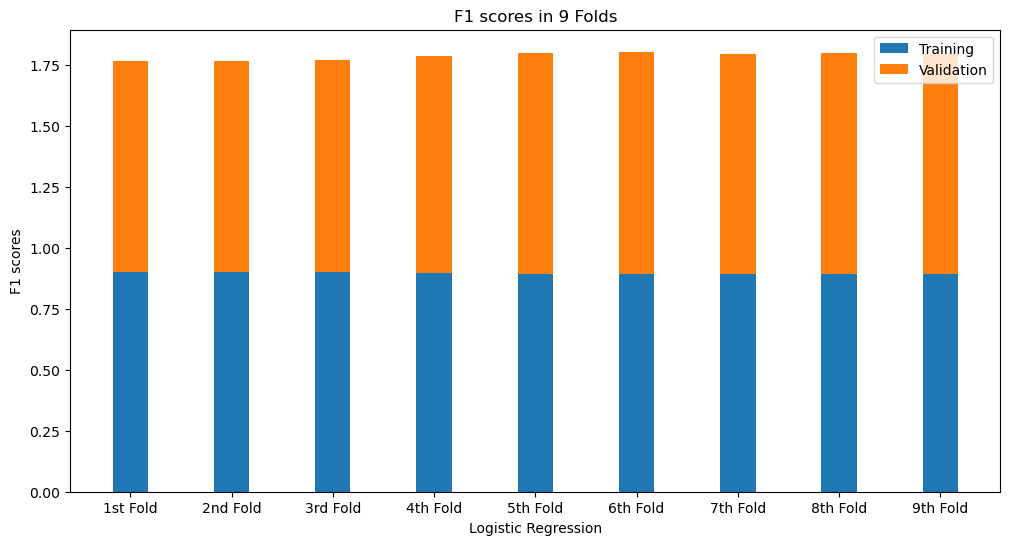

In [100]:
model_name = "Logistic Regression"

plot_stacked_bar_charts(model_name, "Accuracy", "Accuracy scores in 9 Folds", log_result['Training Accuracy scores'], log_result['Validation Accuracy scores'])
plot_stacked_bar_charts(model_name, "Precision", "Precision scores in 9 Folds", log_result['Training Precision scores'], log_result['Validation Precision scores'])
plot_stacked_bar_charts(model_name, "Recall", "Recall scores in 9 Folds", log_result['Training Recall scores'], log_result['Validation Recall scores'])
plot_stacked_bar_charts(model_name, "F1 scores", "F1 scores in 9 Folds", log_result['Training F1 scores'], log_result['Validation F1 scores'])

In [101]:
from sklearn.model_selection import cross_validate

# Define your logistic regression model
model_log = LogisticRegression(max_iter=1000)

# Perform cross-validation
cv_results = cross_validate(model_log, x_ex1_train, y_ex1_train, cv=9,
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                            return_train_score=True)

# Check if cv_results is defined by printing keys
print(cv_results.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_precision', 'train_precision', 'test_recall', 'train_recall', 'test_f1', 'train_f1'])


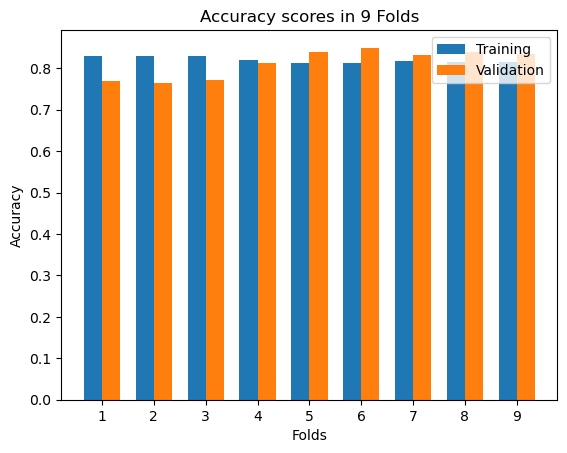

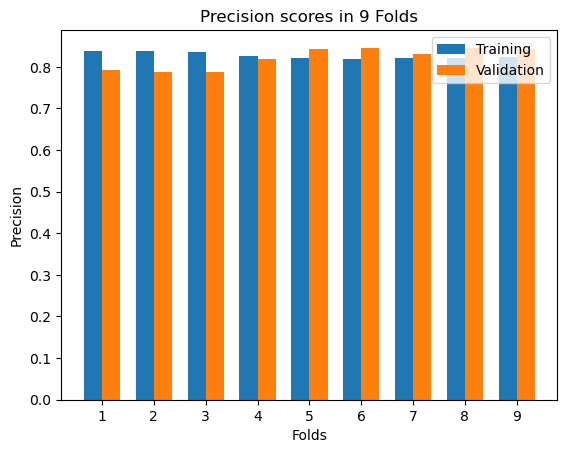

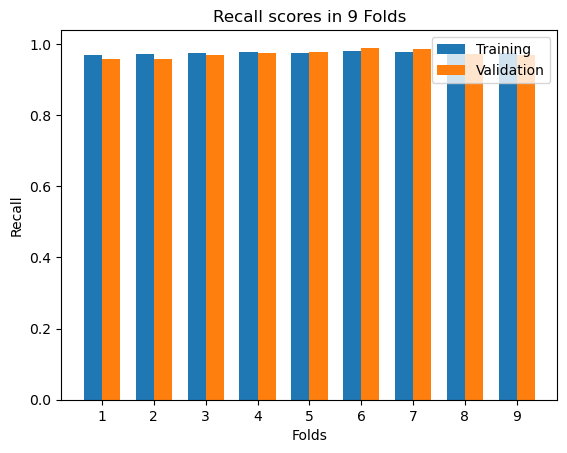

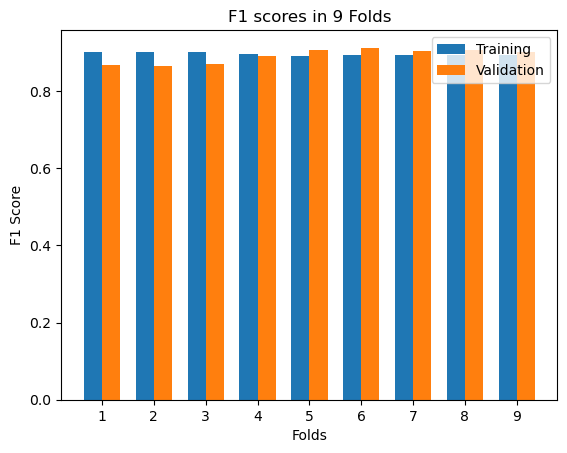

In [102]:


def plot_stacked_bar_charts(metric_name, train_scores, test_scores, title):
    # Setting the positions and width for the bars
    positions = range(len(train_scores))
    bar_width = 0.35
    
    # Plotting the bars
    fig, ax = plt.subplots()
    
    # in position bar i
    train_bars = ax.bar(positions, train_scores, bar_width, label='Training')
    
    # in position bar i+bar_width
    test_bars = ax.bar([p + bar_width for p in positions], test_scores, bar_width, label='Validation')
    
    # Set the title and labels
    ax.set_title(title)
    ax.set_xlabel('Folds')
    ax.set_ylabel(metric_name)
    ax.set_xticks([p + bar_width / 2 for p in positions])
    ax.set_xticklabels(range(1, len(train_scores) + 1))
    
    # Adding the legend and showing the plot
    ax.legend()
    plt.show()

# Now let's plot the accuracy, precision, recall, and f1-score
plot_stacked_bar_charts('Accuracy', cv_results['train_accuracy'], cv_results['test_accuracy'], 'Accuracy scores in 9 Folds')
plot_stacked_bar_charts('Precision', cv_results['train_precision'], cv_results['test_precision'], 'Precision scores in 9 Folds')
plot_stacked_bar_charts('Recall', cv_results['train_recall'], cv_results['test_recall'], 'Recall scores in 9 Folds')
plot_stacked_bar_charts('F1 Score', cv_results['train_f1'], cv_results['test_f1'], 'F1 scores in 9 Folds')

From the visualised results, we can observe that the model prediction performance is very good indicating that we have obtained an accurate model. 


### Decision Tree
We next train the decision tree model

In [103]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

tree_result = onbtain_cross_validition_results(model_tree, x_ex1_train, y_ex1_train, _cv=9)
print(tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Training Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Precision': 1.0, 'Training Recall scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training Recall': 1.0, 'Training F1 scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'Mean Training F1 Score': 1.0, 'Validation Accuracy scores': array([0.72338205, 0.71920668, 0.7473904 , 0.78705637, 0.82881002,
       0.8559499 , 0.83820459, 0.84551148, 0.82863114]), 'Mean Validation Accuracy': 79.71269579145182, 'Validation Precision scores': array([0.7953715 , 0.80024969, 0.8175    , 0.85921053, 0.9221902 ,
       0.93352192, 0.93952802, 0.93506494, 0.92097701]), 'Mean Validation Precision': 0.8804015342096595, 'Validation Recall scores': array([0.87066667, 0.85466667, 0.872     , 0.87066667, 0.85333333,
       0.87882823, 0.8482024 , 0.86284953, 0.85466667]), 'Mean Validation Recall': 0.8628

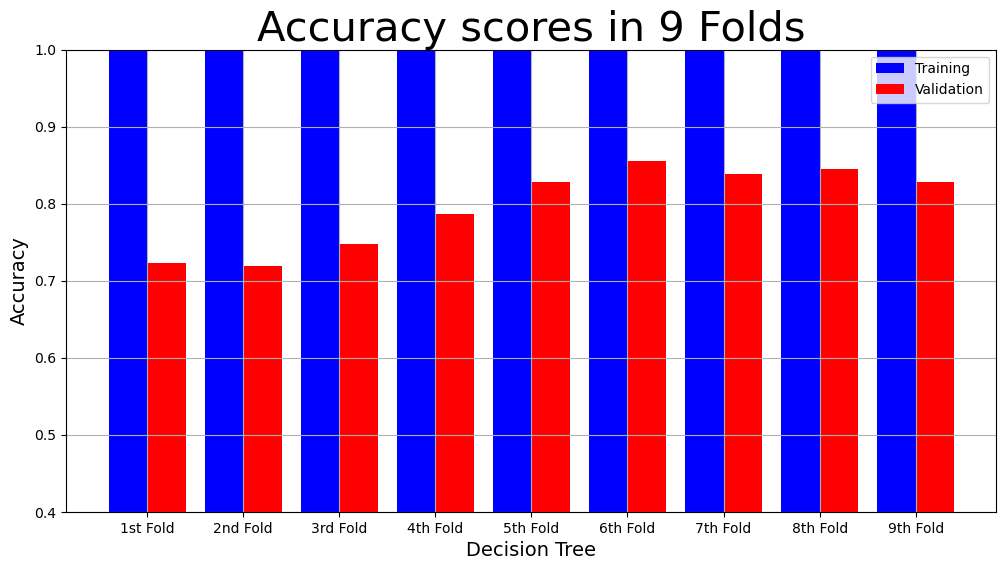

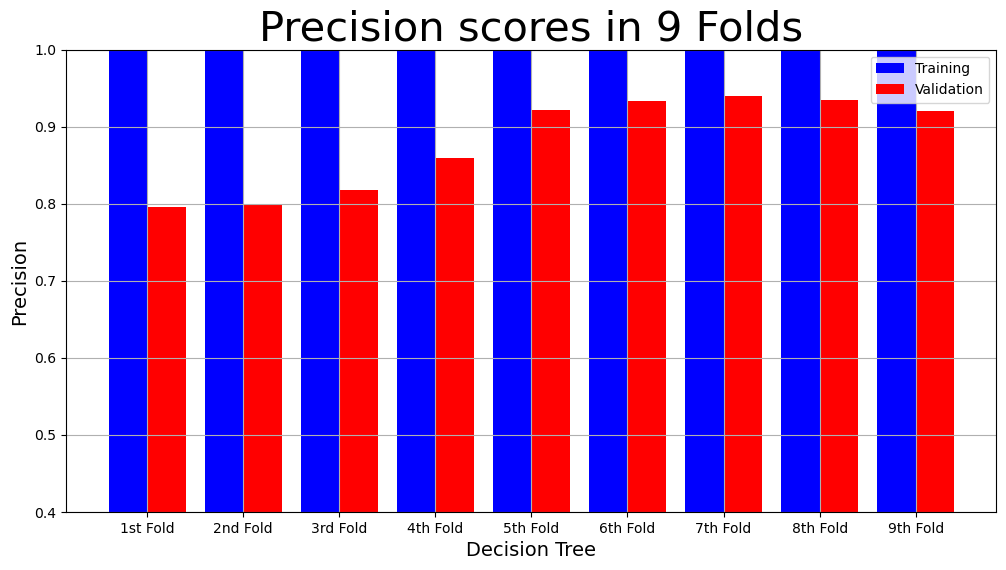

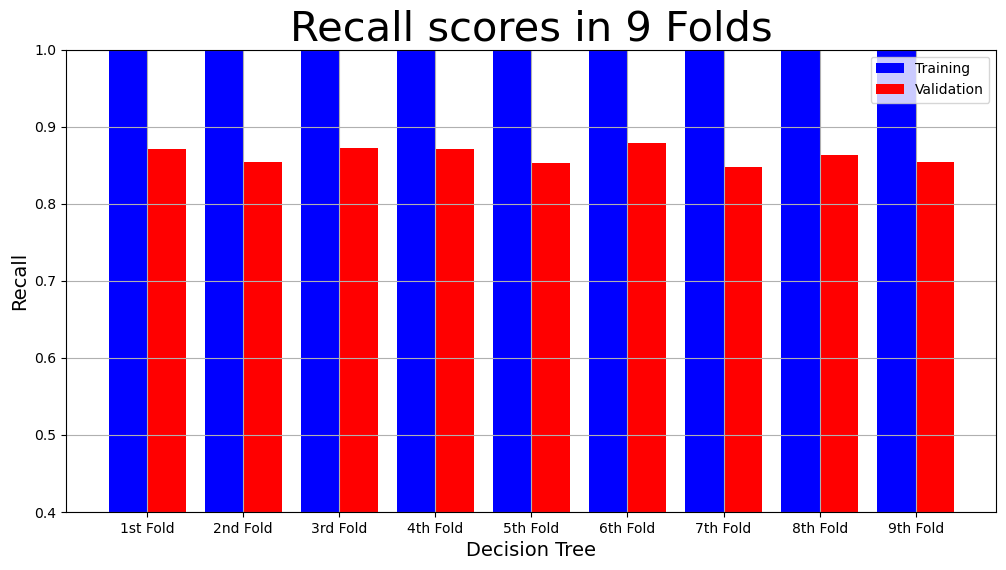

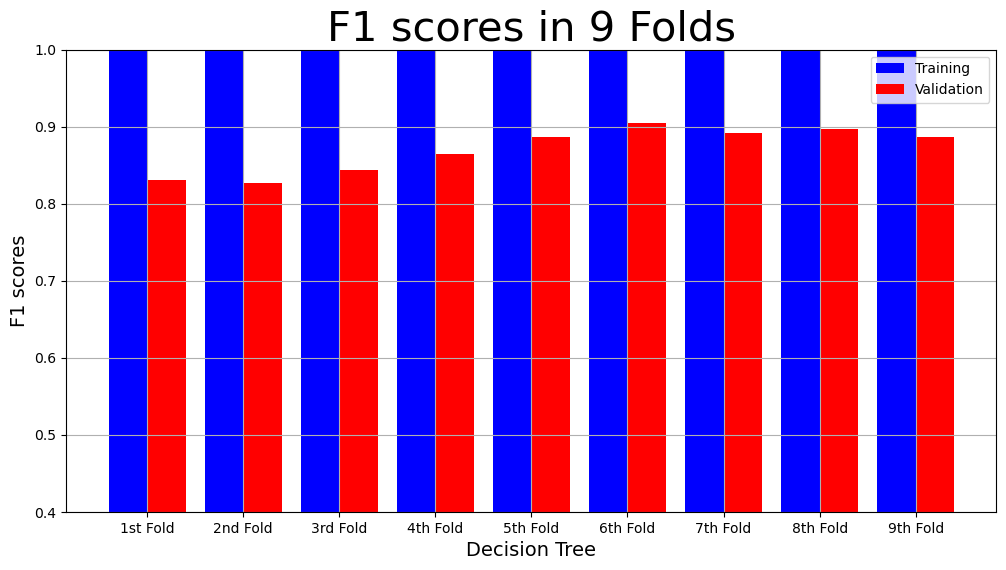

In [104]:
model_name = "Decision Tree"
plot_bar_result(model_name, "Accuracy", "Accuracy scores in 9 Folds", tree_result['Training Accuracy scores'], tree_result['Validation Accuracy scores'])
plot_bar_result(model_name, "Precision", "Precision scores in 9 Folds", tree_result['Training Precision scores'], tree_result['Validation Precision scores'])
plot_bar_result(model_name, "Recall", "Recall scores in 9 Folds", tree_result['Training Recall scores'], tree_result['Validation Recall scores'])
plot_bar_result(model_name, "F1 scores", "F1 scores in 9 Folds", tree_result['Training F1 scores'], tree_result['Validation F1 scores'])

From this result, we can observe that the performance on the training set is much higher than the performance on the validation set. It implies that the decision tree model is over-fitting the training set. 


### Tune hyper-parameter

Since the decision tree model is over-fitting, we need to tune hyper-parameters. 
Tuneable hyper-parameters in a decision tree model include 
* criterion:The function to measure the quality of a split.
* max_depth:The maximum depth of the tree.
* min_samples_split:The minimum number of samples required to split an internal node.
* min_samples_leaf:The minimum number of samples required to be at a leaf node.
For more information regarding these hyper-parameters, please refer to sklearn document:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [105]:
# We tune hyper-parameters as below, which could be pretty time consuming
from sklearn.model_selection import GridSearchCV
tree_para = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,3),
    'min_samples_split':range(1,3),
    'min_samples_leaf':range(1,3),
        }
clf = GridSearchCV(model_tree, tree_para, cv=9)
clf.fit(x_ex1_train, y_ex1_train)

GridSearchCV(cv=9, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 3),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(1, 3)})

In [106]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Now, let us train the decision tree model again with tuned hyper-parameters

In [107]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=2,min_samples_leaf=1,min_samples_split=2)

tree_result = onbtain_cross_validition_results(model_tree, x_ex1_train, y_ex1_train, _cv=9)
print(tree_result)

{'Training Accuracy scores': array([0.87289573, 0.87315673, 0.86885032, 0.86610988, 0.85880204,
       0.85723607, 0.85749706, 0.85658358, 0.8559499 ]), 'Mean Training Accuracy': 86.30090340322819, 'Training Precision scores': array([0.86060519, 0.8607486 , 0.85669426, 0.85423488, 0.84747917,
       0.84602369, 0.84626234, 0.84542765, 0.84485429]), 'Mean Training Precision': 0.8513700069679127, 'Training Recall scores': array([0.99966683, 0.99983342, 0.99983342, 0.99966683, 0.99966683,
       0.99966678, 0.99966678, 0.99966678, 0.99966683]), 'Mean Training Recall': 0.9997038332747186, 'Training F1 scores': array([0.92493835, 0.92509248, 0.92274579, 0.92124655, 0.91730358,
       0.91645028, 0.91659028, 0.91610047, 0.91576377]), 'Mean Training F1 Score': 0.9195812827802546, 'Validation Accuracy scores': array([0.78392484, 0.78183716, 0.81524008, 0.83820459, 0.89665971,
       0.9091858 , 0.90709812, 0.91440501, 0.91954023]), 'Mean Validation Accuracy': 86.28995059417635, 'Validation Pre

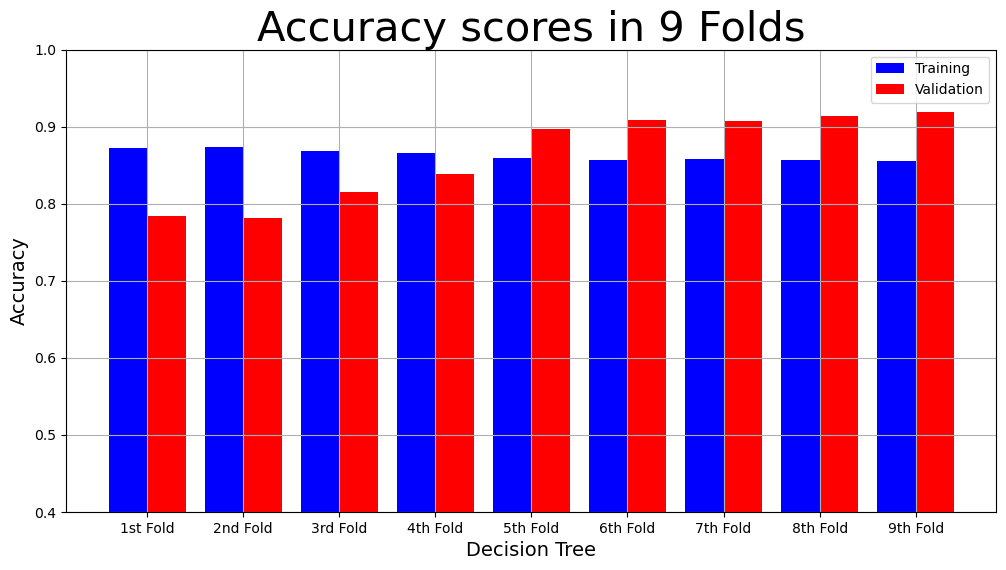

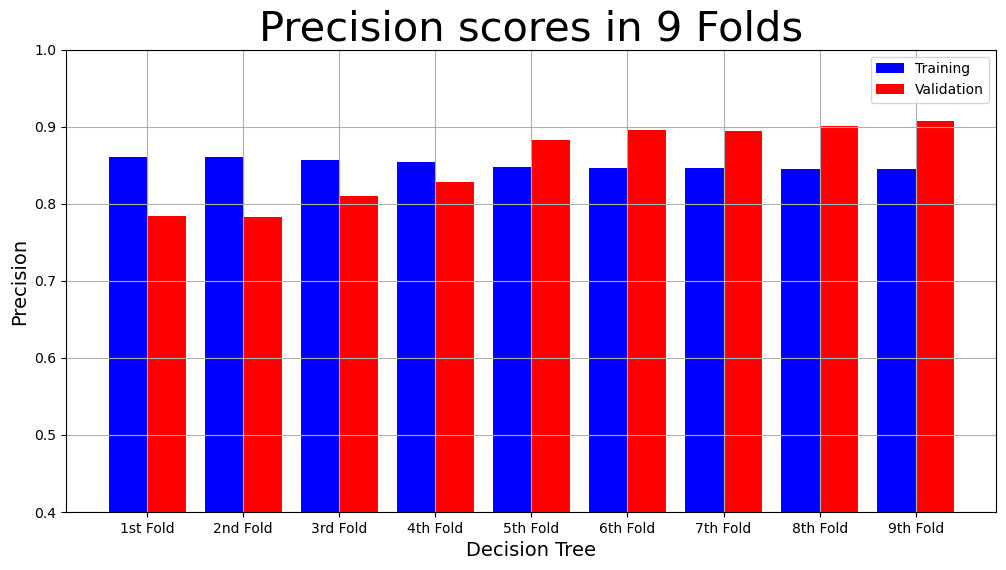

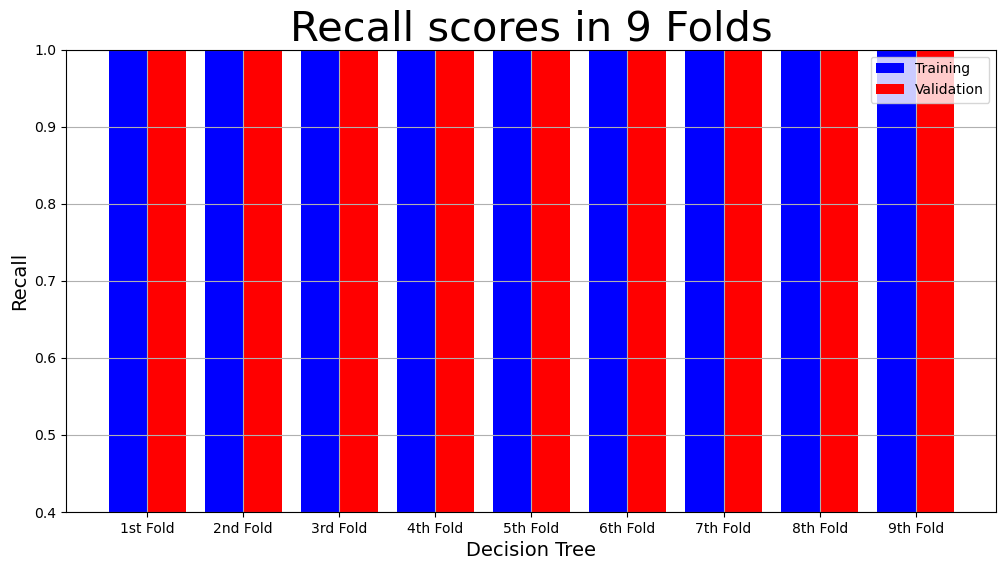

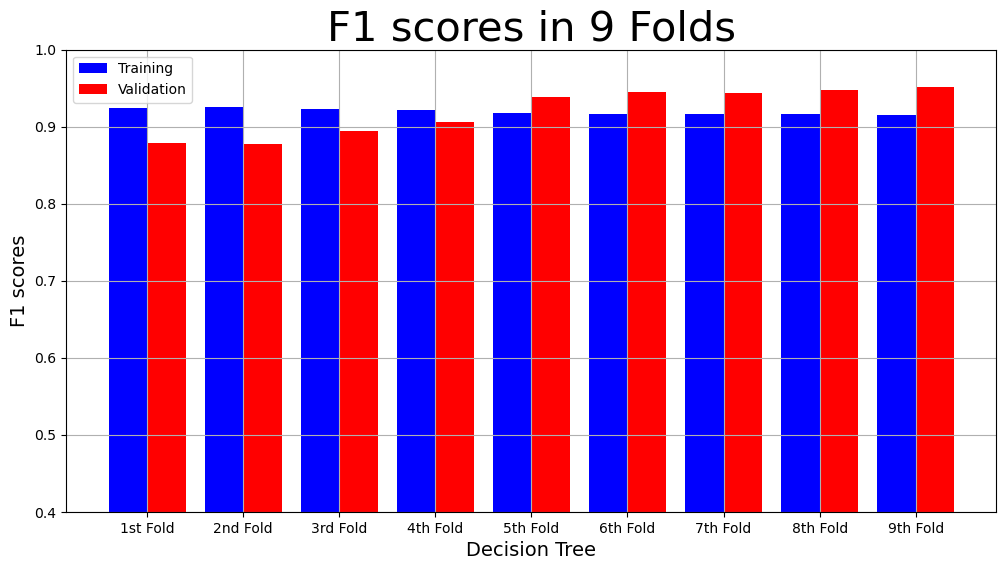

In [108]:
model_name = "Decision Tree"
plot_bar_result(model_name, "Accuracy", "Accuracy scores in 9 Folds", tree_result['Training Accuracy scores'], tree_result['Validation Accuracy scores'])
plot_bar_result(model_name, "Precision", "Precision scores in 9 Folds", tree_result['Training Precision scores'], tree_result['Validation Precision scores'])
plot_bar_result(model_name, "Recall", "Recall scores in 9 Folds", tree_result['Training Recall scores'], tree_result['Validation Recall scores'])
plot_bar_result(model_name, "F1 scores", "F1 scores in 9 Folds", tree_result['Training F1 scores'], tree_result['Validation F1 scores'])

Through comparing 'Mean Validation Accuracy', 'Mean Validation Precision', 'Mean Validation Recall', 'Mean Validation F1 Score', we can observe the difference between training set performance and validation set performance becomes much smaller. Then, we can assert taht overfitting has been removed. 

### Evaluation with test set
This is the last step. We further evaluate the performance of the decision tree model on the test set. 

In [109]:
from sklearn.metrics import r2_score,classification_report,accuracy_score, plot_confusion_matrix
final_model = clf.best_estimator_
y_pred=final_model.predict(x_ex1_test)
print(final_model)
print('Train success rate: %',final_model.score(x_ex1_train,y_ex1_train)*100)
print('Test success rate: %',accuracy_score(y_ex1_test,y_pred)*100)
plot_confusion_matrix(final_model, x_ex1_test, y_ex1_test)  

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/jagmeetrai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

DecisionTreeClassifier(max_depth=2)
Train success rate: % 86.30089316784596
Test success rate: % 90.28213166144201


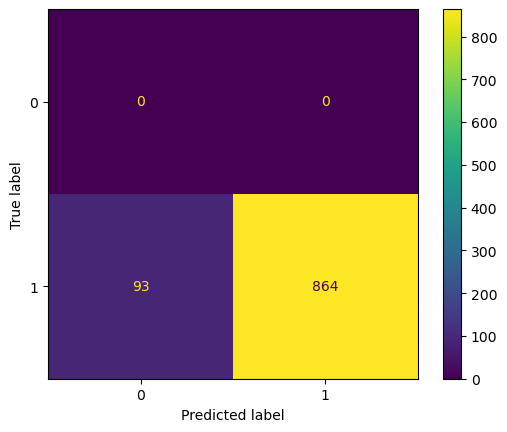

In [110]:
from sklearn.metrics import r2_score, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

final_model = clf.best_estimator_
# Predict the test set results
y_pred = final_model.predict(x_ex1_test)

# Print the model score on training and test data
print(final_model)
print('Train success rate: %', final_model.score(x_ex1_train, y_ex1_train)*100)
print('Test success rate: %', accuracy_score(y_ex1_test, y_pred)*100)

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(final_model, x_ex1_test, y_ex1_test)

From the evaluation result on the test set, we can find that the prediction performance is very poor on the test set. 
The accuracy is only about 32% on the test set


DecisionTreeClassifier(max_depth=2)
Train success rate: % 86.30089316784596
Test success rate: % 90.28213166144201


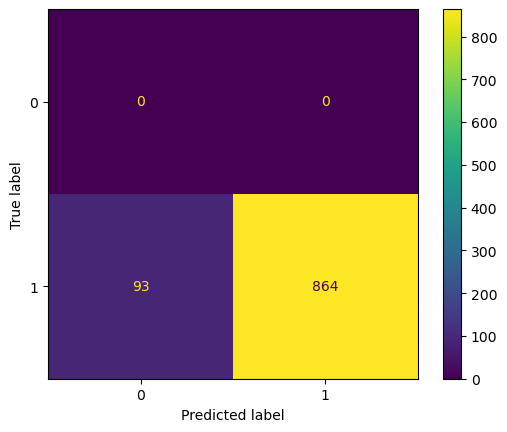

In [111]:
from sklearn.metrics import r2_score, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Assuming clf is your trained classifier object
# And make sure it is trained with the correct data
final_model = clf.best_estimator_

# Predict the test set results
y_pred = final_model.predict(x_ex1_test)

# Print the model score on training and test data
print(final_model)
print('Train success rate: %', final_model.score(x_ex1_train, y_ex1_train)*100)
print('Test success rate: %', accuracy_score(y_ex1_test, y_pred)*100)

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(final_model, x_ex1_test, y_ex1_test)